## Section 1 import and process data

In [1]:
#load libraries
library(Seurat)
library(ggplot2)
library(openxlsx)
library(dplyr)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




In [2]:
# import raw data of scRNA-seq
raw_data<-read.delim("C:\\Data C\\scRNA analysis\\scRNA seq responder to ICB in melanoma Cancer Cell 2018\\GSE120575_Sade_Feldman_melanoma_single_cells_TPM_GEO.txt", 
                     header=T, 
                     stringsAsFactors = F)  

In [3]:
# check data
print(class(raw_data))
print(dim(raw_data))

[1] "data.frame"
[1] 55738 16292


In [4]:
## according to paper author description, they profiled totally 16291 cells, with 55737 genes. 
#quick check the data
head(raw_data)
# first row of df is patients information
# first column has real values_; last column has NA value there seems to be a shift of columns names


,X,A10_P3_M11,A11_P1_M11,A11_P3_M11,A11_P4_M11,A12_P3_M11,A12_P6_M11,A2_P1_M11,A2_P4_M11,A3_P1_M11,⋯,H12_P5_M67_L001_T_enriched,H1_P5_M67_L001_T_enriched,H2_P5_M67_L001_T_enriched,H3_P5_M67_L001_T_enriched,H4_P5_M67_L001_T_enriched,H5_P5_M67_L001_T_enriched,H6_P5_M67_L001_T_enriched,H7_P5_M67_L001_T_enriched,H8_P5_M67_L001_T_enriched,H9_P5_M67_L001_T_enriched
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,Pre_P1,⋯,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,Post_P6_T_enriched,NA
TSPAN6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NA
TNMD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NA
DPM1,0.00,9.24,0.00,7.99,0.00,0.00,0.00,0.00,8.44,0.00,⋯,6.60,0.00,0.00,0.00,7.34,0.00,0.00,0.00,0.00,NA
SCYL3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,5.15,2.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NA
C1orf112,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,8.03,0.00,0.00,0.61,7.65,0.00,0.00,0.00,0.00,NA


In [5]:
## correct the dataframe
# extract patient info first 
Patient_info<-raw_data[1,]
length(Patient_info)
Patient_info[16292]
# remove the last element_NA
Patient_info<-Patient_info[-16292]
length(Patient_info)

[1] 16292

,H9_P5_M67_L001_T_enriched
,<lgl>
,NA


[1] 16291

In [6]:
## correct the dataframe
#remove first row
raw_data<-raw_data[-1,]

# extract columns names
Col_name<-colnames(raw_data)
#remove the first col name
Col_name<-Col_name[-1]

#remove the last column of dataframe
raw_data<-raw_data[, -16292]
#re-assign the correct column names
colnames(raw_data)<-Col_name

dim(raw_data)

[1] 55737 16291

In [7]:
head(raw_data)

,A10_P3_M11,A11_P1_M11,A11_P3_M11,A11_P4_M11,A12_P3_M11,A12_P6_M11,A2_P1_M11,A2_P4_M11,A3_P1_M11,A3_P3_M11,⋯,H12_P5_M67_L001_T_enriched,H1_P5_M67_L001_T_enriched,H2_P5_M67_L001_T_enriched,H3_P5_M67_L001_T_enriched,H4_P5_M67_L001_T_enriched,H5_P5_M67_L001_T_enriched,H6_P5_M67_L001_T_enriched,H7_P5_M67_L001_T_enriched,H8_P5_M67_L001_T_enriched,H9_P5_M67_L001_T_enriched
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TSPAN6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TNMD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
DPM1,0.00,9.24,0.00,7.99,0.00,0.00,0.00,0.00,8.44,0.00,⋯,0.00,6.60,0.00,0.00,0.00,7.34,0.00,0.00,0.00,0.00
SCYL3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,5.15,2.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00
C1orf112,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,8.03,0.00,0.00,0.61,7.65,0.00,0.00,0.00,0.00
FGR,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.24,0.00,⋯,0.00,0.00,0.00,0.00,6.72,0.00,0.00,0.00,0.00,0.00


In [16]:
## To reduce memory load, extract all the CD8 cells first before seurat obj generation
# import the CD8 cell ID provided by authors
CD8_cluster<-as.data.frame(read.xlsx(
    "C:\\Data C\\scRNA analysis\\scRNA seq responder to ICB in melanoma Cancer Cell 2018\\All CD8 cell cluster info.xlsx"))
head(CD8_cluster)

#extract the cell ID
CD8_ID=CD8_cluster$Cell.Name
class(CD8_ID)
length(CD8_ID)

,Cell.Name,Cluster
,<chr>,<chr>
1,A2_P4_M11,CD8_G
2,A4_P3_M11,CD8_B
3,A4_P4_M11,CD8_B
4,A4_P6_M11,CD8_G
5,A6_P6_M11,CD8_B
6,A7_P2_M11,CD8_G


[1] "character"

[1] 6350

In [20]:
# aligh the cell ID of raw count with patient information for later use
cell_patients <- data.frame(Cell_ID = colnames(raw_data))
Patient_vector<-as.vector(Patient_info)
cell_patients$Patient<-Patient_vector
dim(cell_patients)
head(cell_patients)


[1] 16291     2

,Cell_ID,Patient
,<chr>,<named list>
1,A10_P3_M11,Pre_P1
2,A11_P1_M11,Pre_P1
3,A11_P3_M11,Pre_P1
4,A11_P4_M11,Pre_P1
5,A12_P3_M11,Pre_P1
6,A12_P6_M11,Pre_P1


In [21]:
#extract the columns based on CD8 cell ID
CD8_vec<-as.vector(CD8_ID)

## During extraction of raw_data columns based on CD8 cell ID
## There are undefined columns from CD8 vec, need to figure out why


ERROR: Error in `[.data.frame`(raw_data, , CD8_vec): undefined columns selected


In [ ]:
#extract the identified CD8 cell ID
valid_columns <- CD8_vec[CD8_vec %in% colnames(raw_data)]
length(valid_columns)
# extract the unidentified cells
Unidentified_cells <- setdiff(CD8_vec, valid_columns)
Unidentified_cells  


In [35]:
# double check
'A10_P3_MMD1_84A_L001' %in% colnames(raw_data)

# extract the column names with similar strings
cd8_test <- colnames(raw_data)[grepl("A8_P2_M90", colnames(raw_data))]
cd8_test

[1] FALSE

[1] "A8_P2_M90.7.24.17" "A8_P2_M90.7.31.17"

In [37]:
# Conclusion: the '-' in cell id was replaced with'.' in raw data
## replace '-' with '.' in CD8 cell id
CD8_vec_new <- gsub("-", ".", CD8_vec)
valid_columns <- CD8_vec_new[CD8_vec_new %in% colnames(raw_data)]
length(valid_columns) ## problem solved

[1] 6350

In [42]:
# extract CD8 data based on new vector
CD8_raw<-raw_data[,CD8_vec_new]

# extract patient information for later use
CD8_patients_df <- cell_patients[cell_patients$Cell_ID %in% CD8_vec_new, ]
dim(CD8_patients_df)

#double check
identical(CD8_patients_df$Cell_ID, CD8_vec_new) ## orders are changed during extraction

#reorder
CD8_patients_reorder <- CD8_patients_df[match(CD8_vec_new, CD8_patients_df$Cell_ID), ]
identical(CD8_patients_reorder$Cell_ID, CD8_vec_new) ## problems solved

# extract patients info list for later use
CD8_Patientinfo<-CD8_patients_reorder$Patient
length(CD8_Patientinfo)

[1] 6350    2

[1] FALSE

[1] TRUE

[1] 6350

## Section 2 Create Seurat Obj, normalize, scale PCA, UMAP

In [84]:
# generate seurat object of CD8 cells
Seu_CD8<-CreateSeuratObject(count=CD8_raw, min.cells = 5)

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Data is of class data.frame. Coercing to dgCMatrix."


In [85]:
#check the data
print(Seu_CD8)
print(head(Seu_CD8@meta.data))
print(rownames(Seu_CD8@assays$RNA)[1:5])

An object of class Seurat 
33965 features across 6350 samples within 1 assay 
Active assay: RNA (33965 features, 0 variable features)
 1 layer present: counts
          orig.ident nCount_RNA nFeature_RNA
A2_P4_M11         A2   15453.20         2241
A4_P3_M11         A4   21271.73         3175
A4_P4_M11         A4   17105.03         2464
A4_P6_M11         A4   16816.94         2496
A6_P6_M11         A6   21409.59         3239
A7_P2_M11         A7   12917.63         1781
[1] "TSPAN6"   "DPM1"     "SCYL3"    "C1orf112" "FGR"     


In [86]:
#add the patient information
## double check order of Cell ID in seu obj
identical(rownames(Seu_CD8@meta.data), CD8_vec_new)

# add the patient info
Seu_CD8@meta.data$Patient<-CD8_Patientinfo

print(head(Seu_CD8@meta.data))
print(dim(Seu_CD8@meta.data))

[1] TRUE

          orig.ident nCount_RNA nFeature_RNA Patient
A2_P4_M11         A2   15453.20         2241  Pre_P1
A4_P3_M11         A4   21271.73         3175  Pre_P1
A4_P4_M11         A4   17105.03         2464  Pre_P1
A4_P6_M11         A4   16816.94         2496  Pre_P1
A6_P6_M11         A6   21409.59         3239  Pre_P1
A7_P2_M11         A7   12917.63         1781  Pre_P1
[1] 6350    4


In [87]:
#QC
## Cells were selected based on the information provided by authors
##just do a quick chek
Seu_CD8[["percent.mt"]] <- PercentageFeatureSet(Seu_CD8, pattern = "^MT-")
print(head(Seu_CD8@meta.data))


          orig.ident nCount_RNA nFeature_RNA Patient percent.mt
A2_P4_M11         A2   15453.20         2241  Pre_P1  1.0380374
A4_P3_M11         A4   21271.73         3175  Pre_P1  0.6575864
A4_P4_M11         A4   17105.03         2464  Pre_P1  0.9073354
A4_P6_M11         A4   16816.94         2496  Pre_P1  0.9844240
A6_P6_M11         A6   21409.59         3239  Pre_P1  0.7285053
A7_P2_M11         A7   12917.63         1781  Pre_P1  1.2482940


In [88]:
# modify the ident
## need to remove the ident provided by authors; this information can be saved for later use
Ident_CD8<-Seu_CD8@meta.data$orig.ident
Seu_CD8@meta.data$orig.ident<-NULL
Idents(Seu_CD8) <- "all_cells"

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


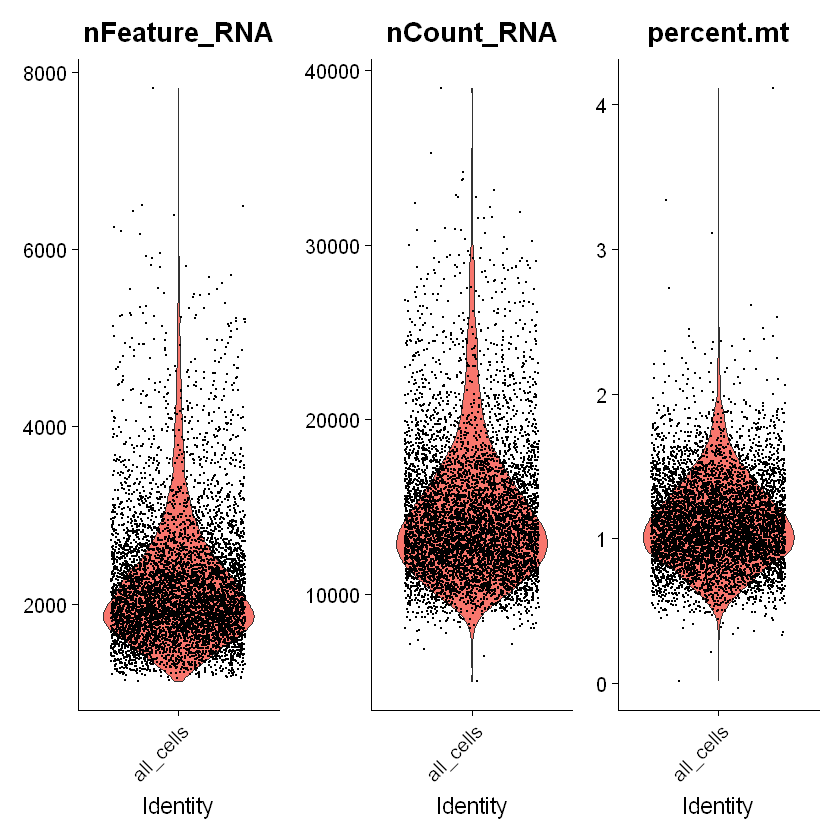

In [89]:
# quick check
VlnPlot(Seu_CD8, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
## percent.mt looks quite good

In [90]:
# Normalize the seurat object
Seu_CD8_Norm<-NormalizeData(Seu_CD8)

print(Seu_CD8_Norm)

Normalizing layer: counts



An object of class Seurat 
33965 features across 6350 samples within 1 assay 
Active assay: RNA (33965 features, 0 variable features)
 2 layers present: counts, data


In [ ]:
##Identify highly variable features
Seu_CD8_Norm<- FindVariableFeatures(Seu_CD8_Norm, selection.method = "vst", nfeatures = 2000)
print(Seu_CD8_Norm)
# Identify the 30 most highly variable genes
top30 <- head(VariableFeatures(Seu_CD8_Norm), 30)
print(top30)



In [94]:
#The data is not big as only CD8 cells are included, scaling based on all genes, to be safe
all.genes <- rownames(Seu_CD8_Norm)
Seu_CD8_Norm <- ScaleData(Seu_CD8_Norm, features = all.genes)
print(Seu_CD8_Norm)


Centering and scaling data matrix



An object of class Seurat 
33965 features across 6350 samples within 1 assay 
Active assay: RNA (33965 features, 2000 variable features)
 3 layers present: counts, data, scale.data


In [95]:
#PCA based on the variable features
Seu_CD8_Norm <- RunPCA(Seu_CD8_Norm, features = VariableFeatures(Seu_CD8_Norm))
print(Seu_CD8_Norm)

print(Seu_CD8_Norm[["pca"]], dims = 1:10, nfeatures = 10) ## PCA features include many classic differentiation markers; data makes sense

PC_ 1 
Positive:  PRF1, HLA-DRA, PSMB9, HLA-DPA1, PSME2, PGAM1, APOBEC3G, GZMA, CCL3, CLIC1 
	   UBE2L6, PSMB10, NKG7, TIGIT, ARPC1B, PSMB8, PPP1CA, COX5A, GZMB, PSMB3 
	   SUMO2, COX8A, CD63, CD27, HLA-DPB1, PTPN6, CXCR6, ARPC3, CTSW, PARK7 
Negative:  CXCR4, TNFAIP3, TSC22D3, YPEL5, DNAJB1, DUSP1, MT-ND3, SLC2A3, FOS, ZNF331 
	   CREM, NFKBIA, TXNIP, BIRC3, PPP1R15A, TMEM256P2, TOB1, TUBA4A, ANXA1, SNHG1 
	   DUSP2, LEPROTL1, SRSF2, RP11-589C21.5, RP11-406H21.2, IGLV3-12, SRSF7, IL23A, RNU4-51P, RN7SL402P 
PC_ 2 
Positive:  TRAF3IP3, GIMAP4, PTPN6, TXNIP, RNU4-2, RP11-345J4.6, C17orf62, FGFBP2, C9orf142, AP1G2 
	   CD52, GSTK1, IRF9, TRIM22, RNU5F-1, LCK, RMRP, PSMB10, PCED1B-AS1, RNU6-151P 
	   RNU6-1152P, AC008746.12, RNA5SP483, TRAV1-2, LAT, TRBV3-1, RP11-406H21.2, GMFG, SNORD13, ZCCHC18 
Negative:  CREM, ZNF331, DNAJA1, TNFAIP3, YPEL5, DNAJB1, CXCR4, TSC22D3, DUSP2, TUBA4A 
	   RGS2, HSPD1, BIRC3, TOB1, HSPE1, TUBA1B, HSP90AB1, RGS1, SRSF7, EIF5 
	   HERPUD1, SRSF2, DUSP1, LDHA, 

An object of class Seurat 
33965 features across 6350 samples within 1 assay 
Active assay: RNA (33965 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 dimensional reduction calculated: pca
PC_ 1 
Positive:  PRF1, HLA-DRA, PSMB9, HLA-DPA1, PSME2, PGAM1, APOBEC3G, GZMA, CCL3, CLIC1 
Negative:  CXCR4, TNFAIP3, TSC22D3, YPEL5, DNAJB1, DUSP1, MT-ND3, SLC2A3, FOS, ZNF331 
PC_ 2 
Positive:  TRAF3IP3, GIMAP4, PTPN6, TXNIP, RNU4-2, RP11-345J4.6, C17orf62, FGFBP2, C9orf142, AP1G2 
Negative:  CREM, ZNF331, DNAJA1, TNFAIP3, YPEL5, DNAJB1, CXCR4, TSC22D3, DUSP2, TUBA4A 
PC_ 3 
Positive:  RPL36A, RPS21, RPL36, EEF1B2, RPL38, RPL39, RPS5, RPL31, RPS10, RPL35 
Negative:  NKG7, CCL4, PRF1, GZMB, GZMH, CST7, CCL3, RGS1, CXCR6, GZMA 
PC_ 4 
Positive:  GZMA, CD69, ANXA1, GZMH, MYL12A, FGFBP2, CD52, SLC2A3, CXCR4, NKG7 
Negative:  HSPA1A, CXCL13, HSPA1B, HSPD1, HSPE1, HSPA6, CD27, SOD1, TIGIT, HSP90AB1 
PC_ 5 
Positive:  RGS1, CXCR4, CXCL13, CD27, ITM2A, TSC22D3, LEPROTL1, 

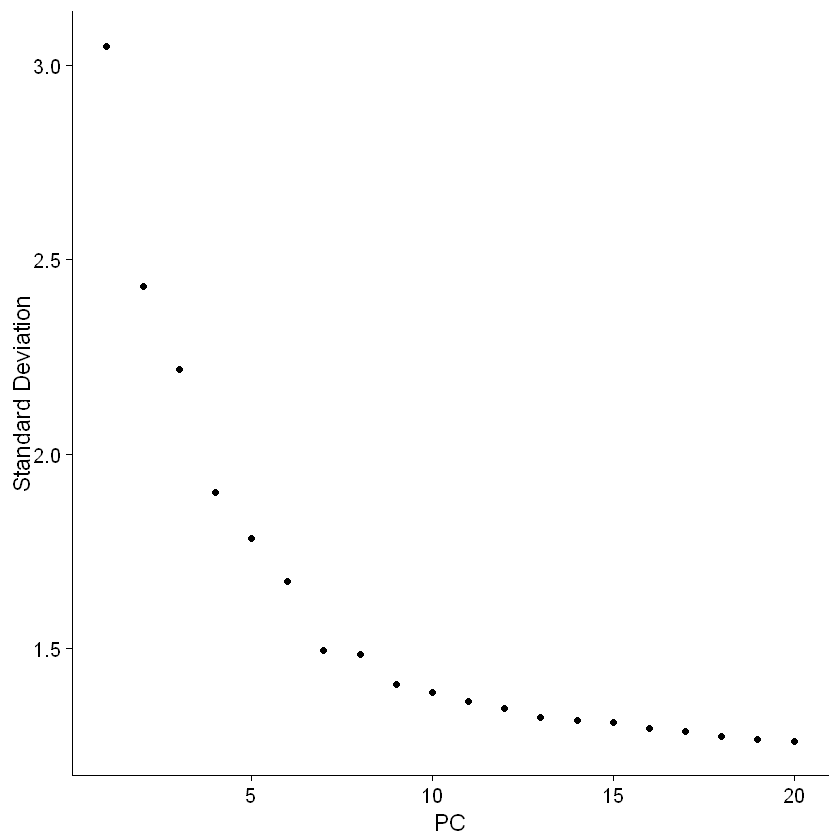

In [96]:
#check dimensions for clusterting based on PCA
ElbowPlot(Seu_CD8_Norm)  # try 14 PCAs

In [115]:
#clustering with 14 PCAs
Seu_CD8_Norm <- FindNeighbors(Seu_CD8_Norm, dims = 1:14)
Seu_CD8_Norm <- FindClusters(Seu_CD8_Norm, resolution = 0.3)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6350
Number of edges: 198614

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8112
Number of communities: 4
Elapsed time: 0 seconds


In [ ]:
#run UMAP
Seu_CD8_Norm <- RunUMAP(Seu_CD8_Norm, dims = 1:14)

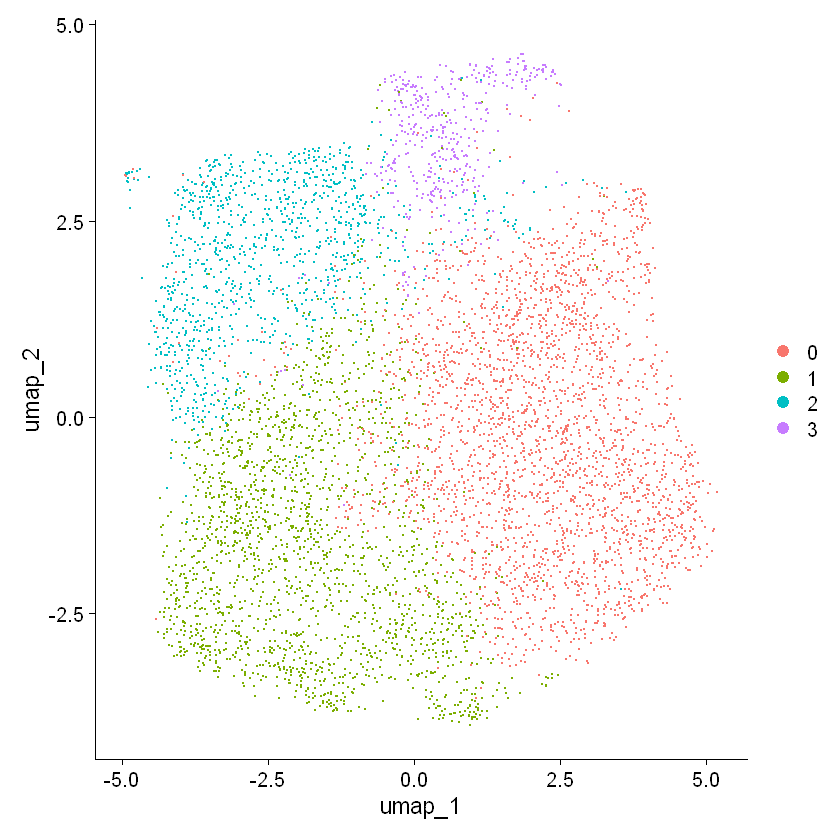

In [117]:
#plot UMAP with clusters
DimPlot(Seu_CD8_Norm, reduction = "umap")

In [ ]:
#reassign the new idents
Seu_CD8_Norm@meta.data

Idents(Seu_CD8_Norm) <-Seu_CD8_Norm@meta.data$seurat_clusters

##Save this seurat object as RDS
saveRDS(Seu_CD8_Norm, "Seu_CD8_UMAP")

In [ ]:
# Check the cluster information
##find the cluster markers
Cluster_marker <- FindAllMarkers(Seu_CD8_Norm, only.pos = TRUE)


In [123]:
## get a quick look of the cluster genes
top_genes <- Cluster_marker %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > 1 & p_val_adj < 0.01) %>%
  arrange(desc(avg_log2FC)) %>%
  slice_head(n = 20)

top_genes

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1.602701e-09,3.403511,0.013,0.001,5.443573e-05,0,C19orf77
5.562275e-31,3.301602,0.047,0.004,1.889227e-26,0,FAM72D
1.436407e-16,3.293330,0.023,0.001,4.878757e-12,0,C18orf56
1.055708e-51,3.226086,0.084,0.008,3.585711e-47,0,DHFRP1
2.145325e-08,3.202610,0.011,0.001,7.286597e-04,0,GTSF1L
5.109158e-58,3.057727,0.097,0.010,1.735326e-53,0,RP11-424C20.2
4.267812e-39,3.012780,0.072,0.010,1.449562e-34,0,SPC25
4.565998e-57,2.979575,0.098,0.011,1.550841e-52,0,GINS2
3.132762e-18,2.964123,0.027,0.002,1.064043e-13,0,C16orf59


## Section 3 Analysis of interest genes

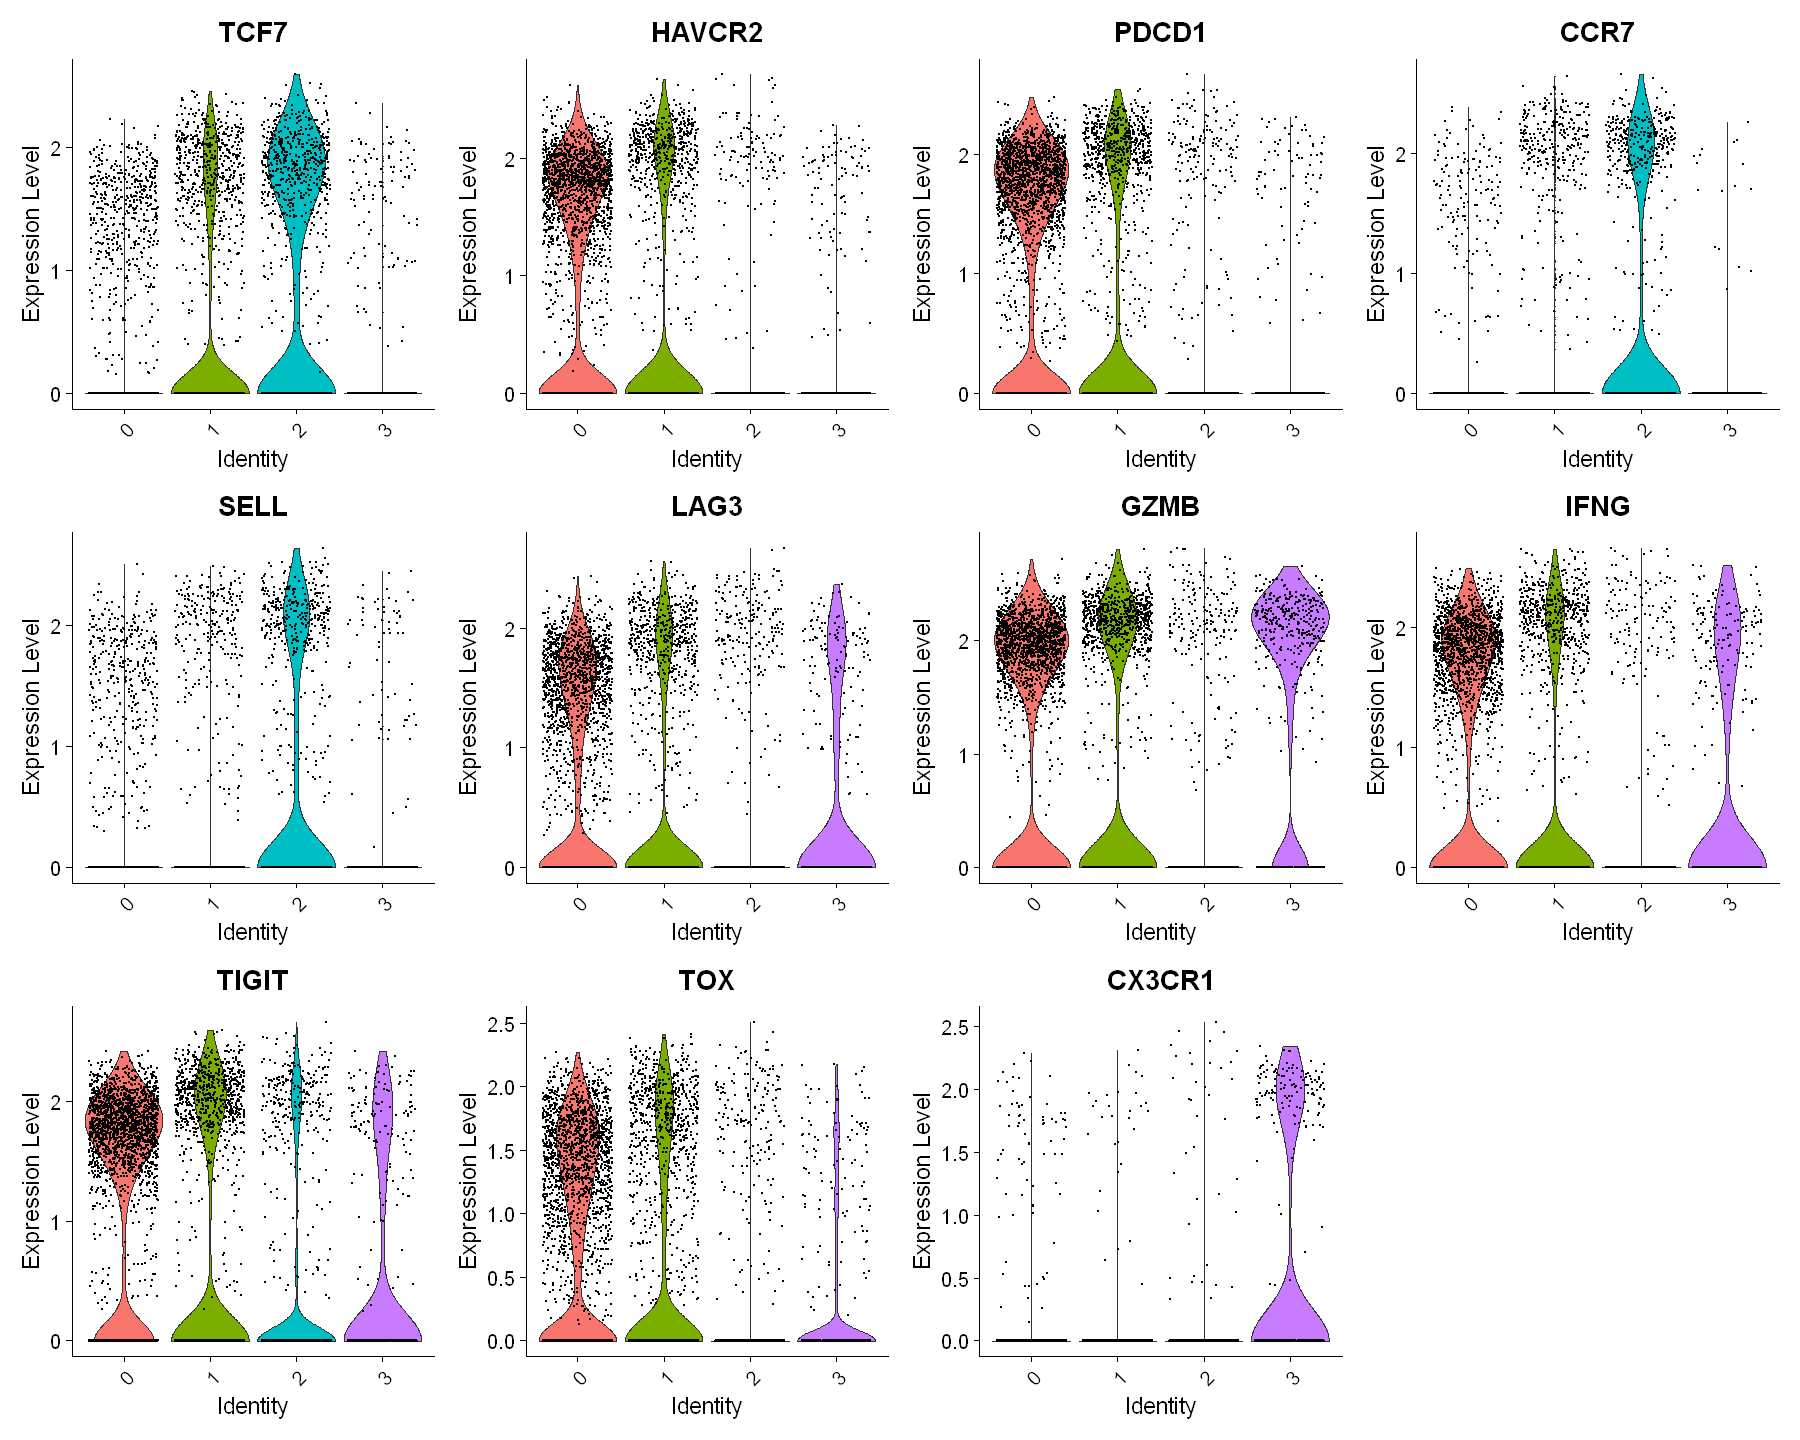

In [138]:
## check the classic markers in each cluster
options(repr.plot.width = 15, repr.plot.height = 12)
VlnPlot(Seu_CD8_Norm, features = c("TCF7", "HAVCR2","PDCD1","CCR7","SELL","LAG3","GZMB","IFNG","TIGIT","TOX","CX3CR1"))
##Cluster 0 as terminal exhausted, 1 as progenitor exhausted, 2 as memory/non-activated T cells, 3 as CXCR1 CD8 cells
##Novel genes of interest are under investigation and unpublished, analysis of this part was removed

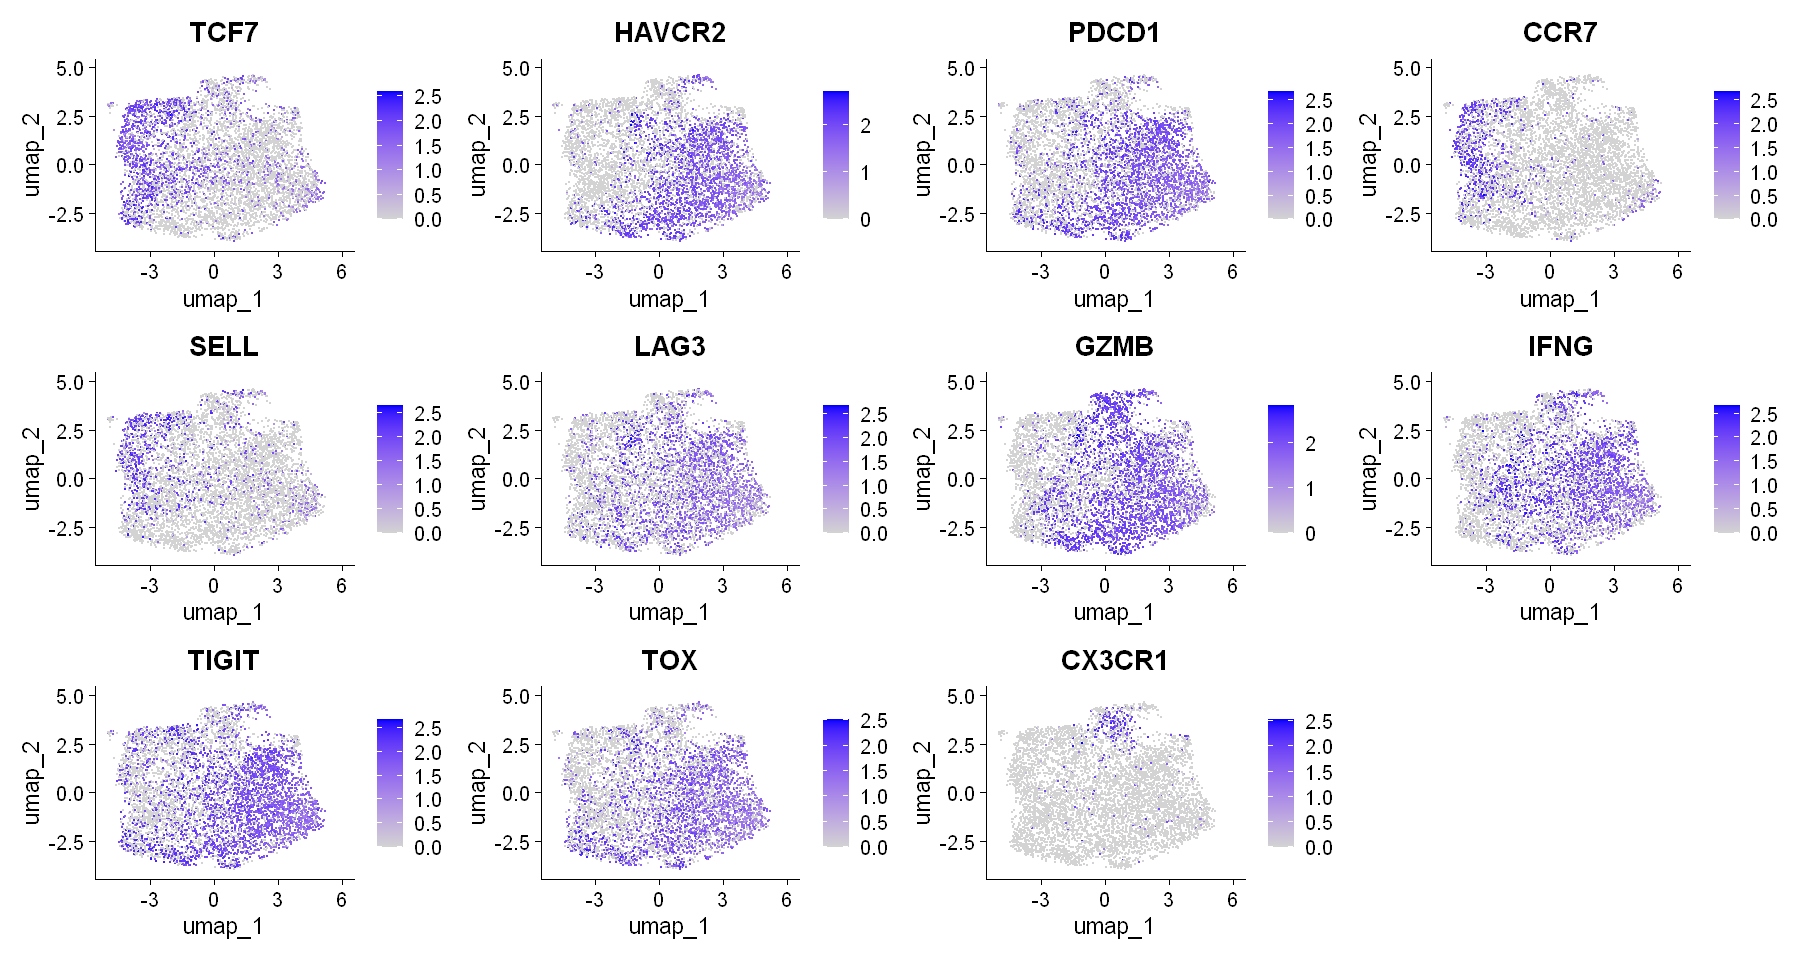

In [136]:
# observe genes expression in UMAP
options(repr.plot.width = 15, repr.plot.height = 8)
FeaturePlot(Seu_CD8_Norm, features = c("TCF7", "HAVCR2","PDCD1","CCR7","SELL","LAG3","GZMB","IFNG","TIGIT","TOX","CX3CR1"))
##Novel genes of interest are under investigation and unpublished, analysis of this part was removed

In [ ]:
## Extract the average expression of different markers and target genes grouped by patients, for further analysis
TIM3_expression<-AggregateExpression(Seu_CD8_Norm, feature="HAVCR2", group.by="Patient")
TCF7_expression<-AggregateExpression(Seu_CD8_Norm, feature="TCF7", group.by="Patient")

write.xlsx(TIM3_expression, "TIM3_ave")
write.xlsx(TCF7_expression, "TCF7_ave")
##Novel genes of interest are under investigation and unpublished, analysis of this part was removed